#### <center> Implemetation du algorithme de Bellman-Ford </center>

##### importation des bibliotheque

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

##### implementation de l'algorithme de Bellman-Ford

In [100]:
def Bellman_Ford(graphe, depart):
    # Initialiser la distance de chaque noeud à l'infini
    distance = {noeud: float('infinity') for noeud in graphe.nodes}
    distance[depart] = 0

    # Initialiser le chemin de chaque noeud comme vide
    chemin = {noeud: [] for noeud in graphe.nodes}
    chemin[depart] = [depart]

    # Obtenir les arêtes du graphe
    aretes = graphe.edges(data=True)

    # Effectuer n-1 itérations
    for _ in range(len(graphe.nodes) - 1):
        for u, v, donnees in aretes:
            # Mettre à jour la distance de chaque noeud
            if distance[v] > distance[u] + donnees['weight']:
                distance[v] = distance[u] + donnees['weight']
                chemin[v] = chemin[u] + [v]

    # Vérifier s'il y a un cycle de poids négatif
    for u, v, donnees in aretes:
        if distance[v] > distance[u] + donnees['weight']:
            print('Le graphe contient un cycle de poids négatif')
            return

    return distance, chemin

##### On crée un graphe pour tester l'algorithme 

In [101]:

g = nx.Graph()

# On ajoute des arêtes au graphe (nœud1, nœud2, poids)
g.add_edge('A', 'B', weight=1)
g.add_edge('B', 'C', weight=2)
g.add_edge('C', 'D', weight=12)
g.add_edge('D', 'A', weight=4)
g.add_edge('A', 'C', weight=5)
g.add_edge('B', 'D', weight=6)


##### On affiche le graphe original

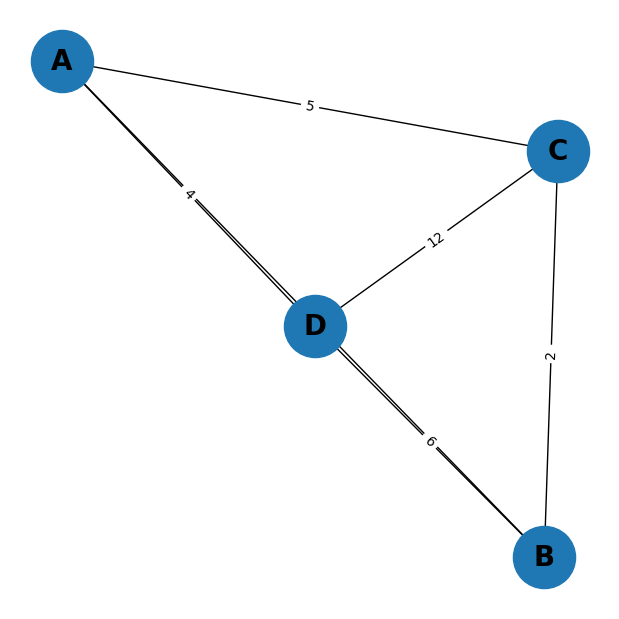

In [102]:
plt.figure(figsize=(6, 6))  # On cree une nouveau figure
pos = nx.spring_layout(g)  # On calcule la position des noued
nx.draw(g, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

# On ajoute les cout des noued a la figure
edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels)

plt.show()  # On affiche l'image

#### On applique l'algorithme de Bellman sur le graphe

In [103]:
distances, chemins = Bellman_Ford(g, 'A')

# On affiche les distances et les chemins
for noeud, distance in distances.items():
    print(f'Distance minimale de A à {noeud} : {distance} par {" -> ".join(chemins[noeud])}')

Distance minimale de A à A : 0 par A
Distance minimale de A à B : 1 par A -> B
Distance minimale de A à C : 3 par A -> B -> C
Distance minimale de A à D : 4 par A -> D
